In [100]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [101]:
def read_csv_files_from_directory(data_hw):
    data_frames = []
    for root, dirs, files in os.walk(data_hw):
        for file in files:
            if file.endswith(".csv"):
                file_path = os.path.join(root, file)
                activity_label = os.path.basename(root)  # отримуємо назву папки як мітку активності
                df = pd.read_csv(file_path)
                df['activity'] = activity_label  # додаємо стовпець з активністю
                data_frames.append(df)
                print(f"Зчитано файл: {file_path}, активність: {activity_label}")
    return data_frames



In [102]:
main_directory = 'C:\\Users\\denlu\\PycharmProjects\\goit-ds-hw-5\\data_hw'
all_data_frames = read_csv_files_from_directory(main_directory)

Зчитано файл: C:\Users\denlu\PycharmProjects\goit-ds-hw-5\data_hw\idle\idle-1.csv, активність: idle
Зчитано файл: C:\Users\denlu\PycharmProjects\goit-ds-hw-5\data_hw\idle\idle-10.csv, активність: idle
Зчитано файл: C:\Users\denlu\PycharmProjects\goit-ds-hw-5\data_hw\idle\idle-100.csv, активність: idle
Зчитано файл: C:\Users\denlu\PycharmProjects\goit-ds-hw-5\data_hw\idle\idle-1000.csv, активність: idle
Зчитано файл: C:\Users\denlu\PycharmProjects\goit-ds-hw-5\data_hw\idle\idle-1001.csv, активність: idle
Зчитано файл: C:\Users\denlu\PycharmProjects\goit-ds-hw-5\data_hw\idle\idle-1002.csv, активність: idle
Зчитано файл: C:\Users\denlu\PycharmProjects\goit-ds-hw-5\data_hw\idle\idle-1003.csv, активність: idle
Зчитано файл: C:\Users\denlu\PycharmProjects\goit-ds-hw-5\data_hw\idle\idle-1004.csv, активність: idle
Зчитано файл: C:\Users\denlu\PycharmProjects\goit-ds-hw-5\data_hw\idle\idle-1005.csv, активність: idle
Зчитано файл: C:\Users\denlu\PycharmProjects\goit-ds-hw-5\data_hw\idle\idle-100

In [103]:
combined_data = pd.concat(all_data_frames, ignore_index=True)

# Вивід перших рядків з доданим стовпцем 'activity'
print(combined_data.head(5))
combined_data

   accelerometer_X  accelerometer_Y  accelerometer_Z activity
0         1.000776         4.616021         8.576031     idle
1         0.718261         4.209007         8.446744     idle
2        -0.909797        -0.282516         9.203311     idle
3         5.099650         0.148441         8.418014     idle
4         1.762132        -0.162806         9.251195     idle


,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,1.000776,4.616021,8.576031,idle
1,0.718261,4.209007,8.446744,idle
2,-0.909797,-0.282516,9.203311,idle
3,5.099650,0.148441,8.418014,idle
4,1.762132,-0.162806,9.251195,idle
...,...,...,...,...
193855,5.109226,-15.452178,-1.470040,walking
193856,6.373365,-11.741165,-8.226476,walking
193857,3.289633,-9.993398,-0.383072,walking
193858,-2.978387,-3.050213,1.273715,walking


In [104]:
# Assuming the combined_data has columns: 'accelerometer_X', 'accelerometer_Y', 'accelerometer_Z', 'activity'
X = combined_data[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']]
y = combined_data['activity']

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [105]:
def extract_features(df):
    df['mean_X'] = df['accelerometer_X'].mean()
    df['mean_Y'] = df['accelerometer_Y'].mean()
    df['mean_Z'] = df['accelerometer_Z'].mean()
    df['std_X'] = df['accelerometer_X'].std()
    df['std_Y'] = df['accelerometer_Y'].std()
    df['std_Z'] = df['accelerometer_Z'].std()
    df['var_X'] = df['accelerometer_X'].var()
    df['var_Y'] = df['accelerometer_Y'].var()
    df['var_Z'] = df['accelerometer_Z'].var()
    return df



In [106]:
combined_data = combined_data.groupby('activity').apply(extract_features)

C:\Users\denlu\AppData\Local\Temp\ipykernel_22320\553701419.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_data = combined_data.groupby('activity').apply(extract_features)


In [107]:
X = combined_data[['mean_X', 'mean_Y', 'mean_Z', 'std_X', 'std_Y', 'std_Z', 'var_X', 'var_Y', 'var_Z']]
y = combined_data['activity']

In [108]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [110]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [111]:
y_pred_rf = rf_clf.predict(X_test)

In [112]:
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6203
     running       1.00      1.00      1.00     20485
      stairs       1.00      1.00      1.00      1022
     walking       1.00      1.00      1.00     11062

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00     38772


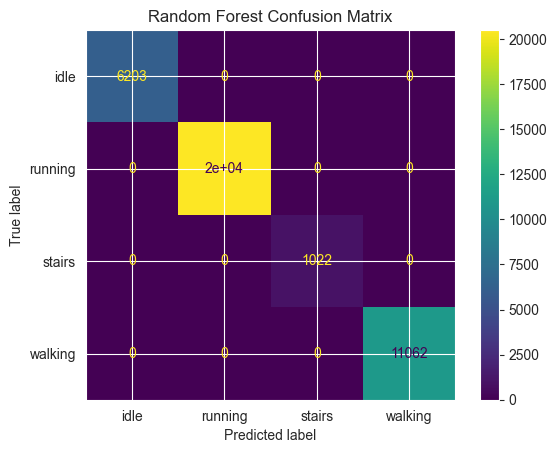

In [113]:
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_clf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_clf.classes_)
disp_rf.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

In [114]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

In [115]:
y_pred_svm = svm_clf.predict(X_test)

In [116]:
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6203
     running       1.00      1.00      1.00     20485
      stairs       1.00      1.00      1.00      1022
     walking       1.00      1.00      1.00     11062

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00     38772


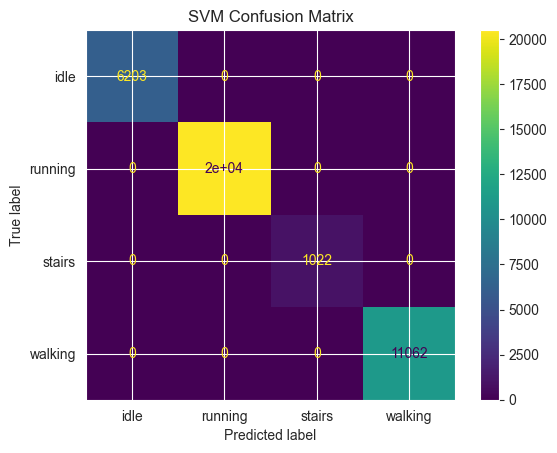

In [117]:
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm_clf.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_clf.classes_)
disp_svm.plot()
plt.title("SVM Confusion Matrix")
plt.show()